In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
from sklearn.cluster import KMeans
import copy
from modules.cv_helpers import get_green

In [4]:
%load_ext autoreload
%autoreload 2

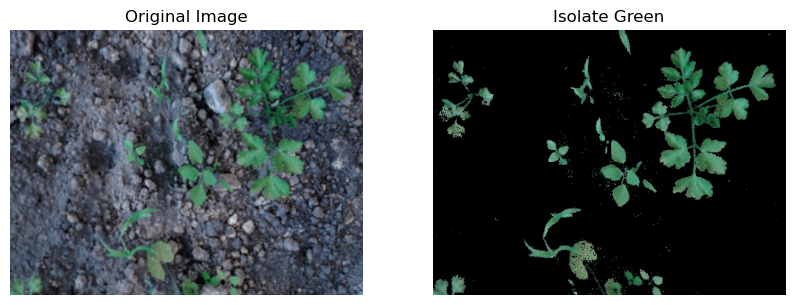

In [3]:
image= cv2.imread('img/img1.png')

green_areas = get_green(image)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot the original
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Plot masked
axs[1].imshow(green_areas)
axs[1].set_title('Isolate Green')
axs[1].axis('off')

plt.show()

#### Remove Noise

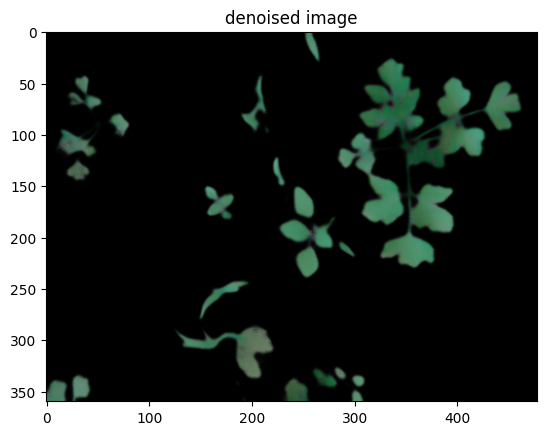

In [5]:
img_denoised = cv2.fastNlMeansDenoisingColored(green_areas, None, h=70, templateWindowSize=7, searchWindowSize=21)
plt.imshow(img_denoised); plt.title("denoised image"); plt.show()

In [6]:
glayer = img_denoised[:,:,1]

arr = copy.deepcopy(glayer)
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if arr[i, j] > 0:
            arr[i, j] = 255

print(f"Values present in image: {[val for val in np.unique(arr)]}")

Values present in image: [0, 255]


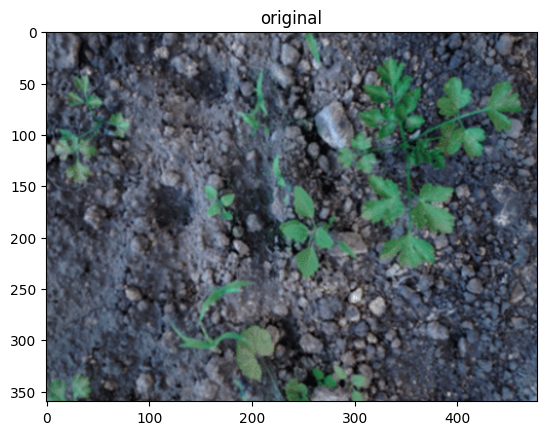

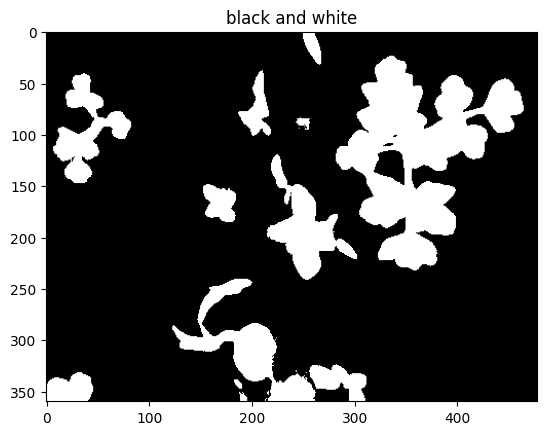

In [7]:
bnw = np.stack((arr, arr, arr), axis=2)
plt.figure(); plt.imshow(image); plt.title("original"); plt.show()
plt.figure(); plt.imshow(bnw); plt.title("black and white"); plt.show()

#### Convert image into (x,y) coordinates

In [33]:
def find_coordinates(array):
    xs,ys = [],[]
    coordinates = []
    for y, row in enumerate(array):
        for x, value in enumerate(row):
            if value == 255:
                xs.append(x)
                ys.append(abs(y-array.shape[0]))
    return xs,ys

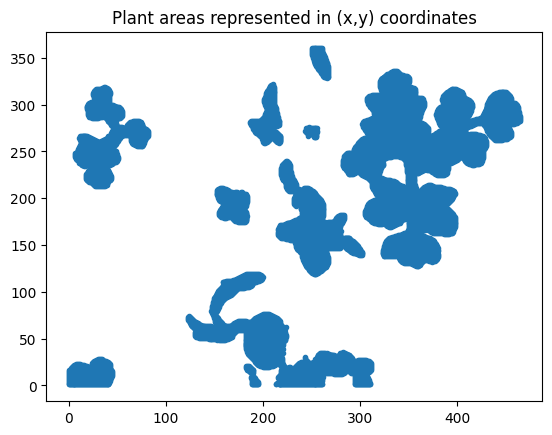

In [42]:
xs,ys = find_coordinates(arr)
plt.scatter(xs,ys,marker='.'); plt.title("Plant areas represented in (x,y) coordinates"); plt.show()